<a href="https://colab.research.google.com/github/jiruneko/expert_scikit/blob/main/expert_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Label counts in y:', np.bincount(y))
print('Label counts in y_train:', np.bincount(y_train))
print('Label counts in y_test:', np.bincount(y_test))

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron
# エポック数40、学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(eta0=0.1, random_state=1)
# 訓練データをモデルに適合させる
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のデータ点の個数を表示
print('Misclassfied examples: %d' % (y_test != y_pred).sum())

Misclassfied examples: 1


In [ ]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [ ]:
print('accuracy: %.3f' % ppn.score(X_test_std, y_test))

accuracy: 0.978


#過学習

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # マーカーとカラーマップ
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # 決定領域のプロット
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  # 各特徴量を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  # 予測結果を元のグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  # グリッドポイントの投稿線のプロット
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  # 軸の範囲の設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # クラスごとにデータ点をプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                marker=markers[idx], label=cl, edgecolor='black')
  # テストデータを目立たせる
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], edgecolor='black',
                alpha=1.0, linewidths=1, marker='o', s=100, label='test set')

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


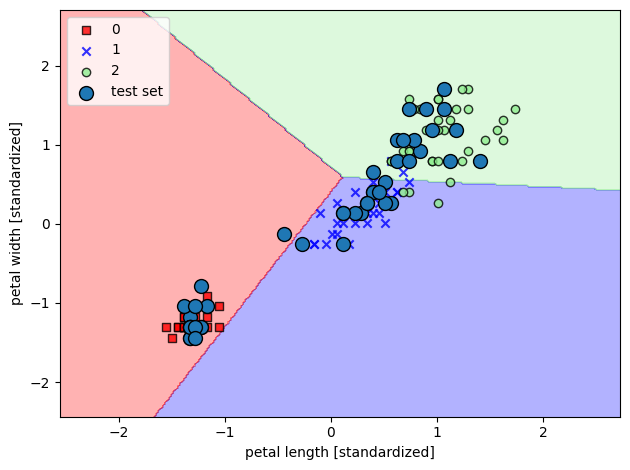

In [ ]:
# 訓練データとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105,150))
# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例の表示
plt.legend(loc='upper left')
# グラフの表示
plt.tight_layout()
plt.show()

# ロジスティック回帰

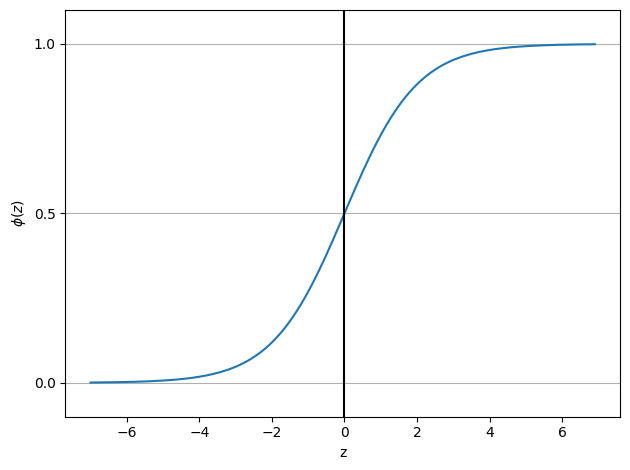

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# シグモイド関数を定義
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で-7以上7未満のデータを生成
z = np.arange(-7, 7, 0.1)
# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)
# 元のデータとシグモイド関数の出力をプロット
plt.plot(z, phi_z)
# 垂直線を追加（z=0）
plt.axvline(0.0, color='k')
# y軸の上限/下限を設定
plt.ylim(-0.1, 1.1)
# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y軸のメモリを追加
plt.yticks([0.0, 0.5, 1.0])
# Axesクラスのオブジェクトの取得
ax = plt.gca()
# y軸のメモリに合わせて水平グリッド線を追加
ax.yaxis.grid(True)
# グラフの表示
plt.tight_layout()
plt.show()

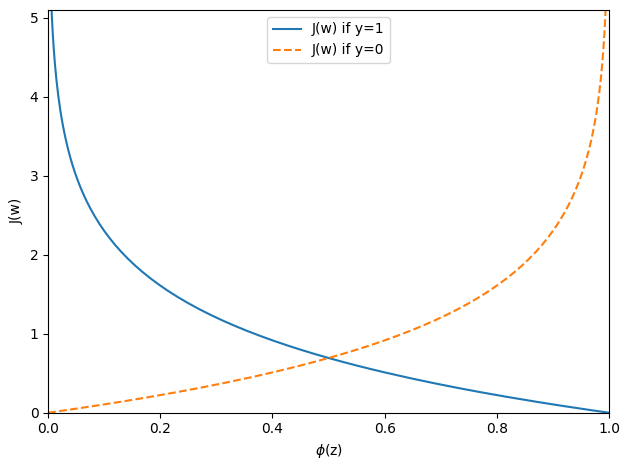

In [ ]:
# y=1のコストを計算する関数
def cost_1(z):
  return - np.log(sigmoid(z))
# y=0のコストを計算する関数
def cost_0(z):
  return - np.log(1 - sigmoid(z))

# 0.1間隔で-10以上10未満のデータを生成
z = np.arange(-10, 10, 0.1)
# シグモイド関数を実行
phi_z = sigmoid(z)
# y=1のコストを計算する関数を実行
c1 = [cost_1(x) for x in z]
# 元のデータとシグモイド関数の出力をプロット
plt.plot(phi_z, c1, label='J(w) if y=1')
# y=0のコストを計算する関数を実行
c0 = [cost_0(x) for x in z]
# 元のデータとシグモイド関数の出力をプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
# x軸とy軸の上限/下限を設定
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
# 軸のラベルを設定
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
# 凡例を設定
plt.legend(loc='upper center')
# グラフを表示
plt.tight_layout()
plt.show()

In [ ]:
class LogisticRegressionGD():
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    # 訓練顔数分までを訓練データを反復処理
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
      # エポックごとのコストを格納
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    # 総入力を計算
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    # ロジスティックシグモイド活性化関数を計算
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    # 1ステップ後のクラスラベルを返す
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


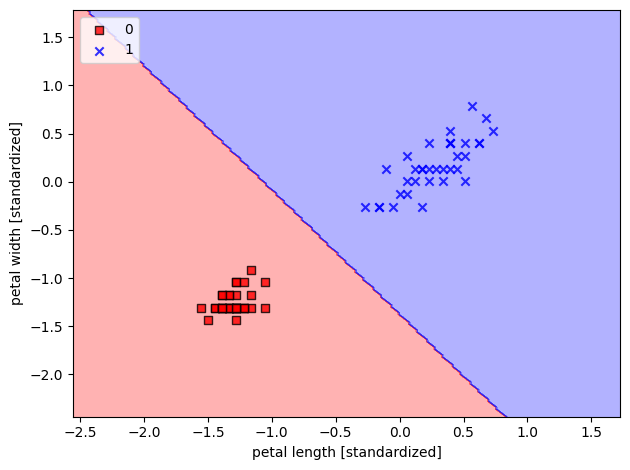

In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
# ロジスティック回帰のインスタンスを生成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
# 訓練データをモデルに適合させる
lrgd = lrgd.fit(X_train_01_subset, y_train_01_subset)
# 決定領域をプロット
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


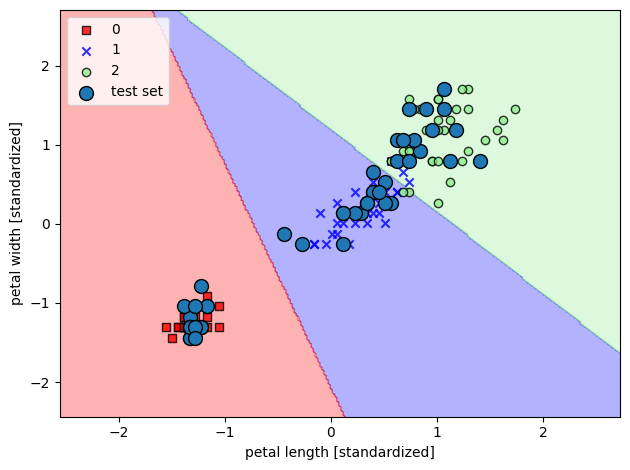

In [ ]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
# 訓練データをモデルに適合させる
lr.fit(X_train_std, y_train)
# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

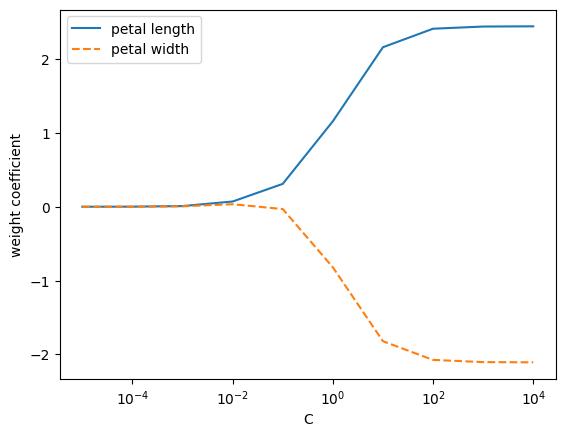

In [ ]:
weights, params = [], []
# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1,
                          solver='lbfgs', multi_class='ovr')
  lr.fit(X_train_std, y_train)
  # 重み係数を格納
  weights.append(lr.coef_[1])
  # 逆正則化パラメータを格納
  params.append(10.**c)

# 重み係数をNumpy配列に変換
weights = np.array(weights)
# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


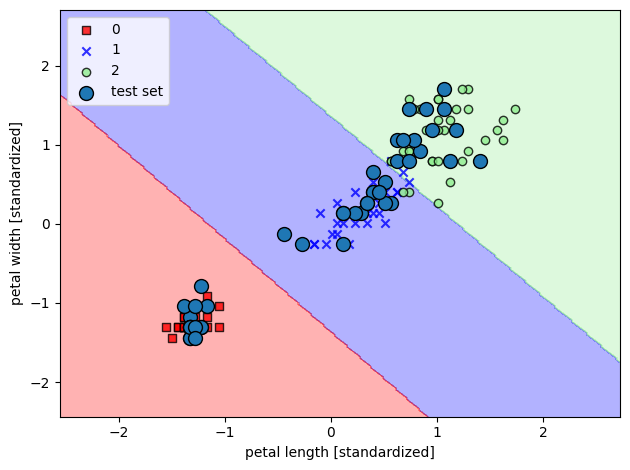

In [ ]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
svm = SVC(kernel='linear', C=1.0, random_state=1)
# 線形SVMのモデルに訓練データを適合させる
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
# 確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss='perceptron')
# 確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')
# 確率的勾配降下法バージョンのSVMを生成
svm = SGDClassifier(loss='hinge')

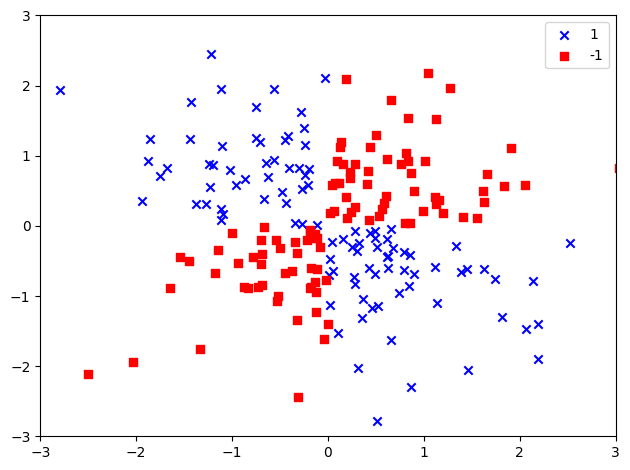

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 乱数シードを固定
np.random.seed(1)
# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200, 2)
# 2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# 排他的論理和の値が真の場合は1、偽の場合は-1を割り当てる
y_xor = np.where(y_xor, 1, -1)
# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label=1)
# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
# 軸の範囲を設定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
# 軸のラベルを設定
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


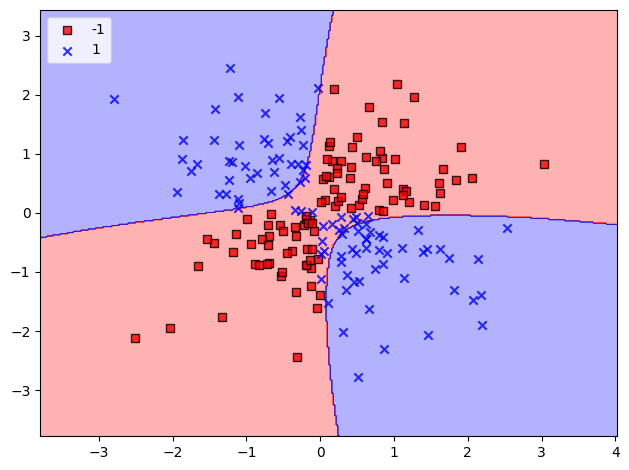

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


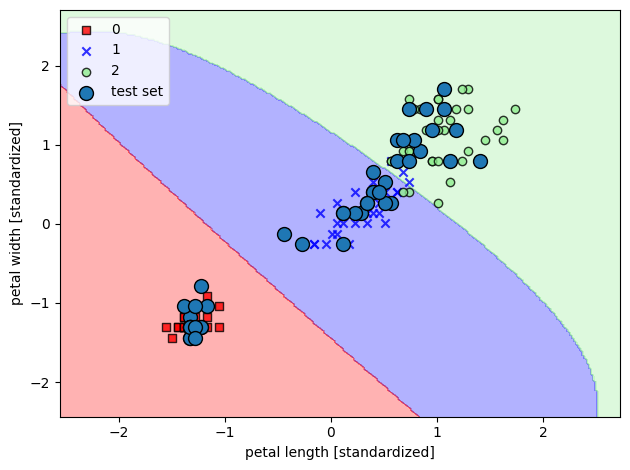

In [ ]:
# RBFカーネルによるSVMのインスタンスを生成(2つのパラメータを変更)
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


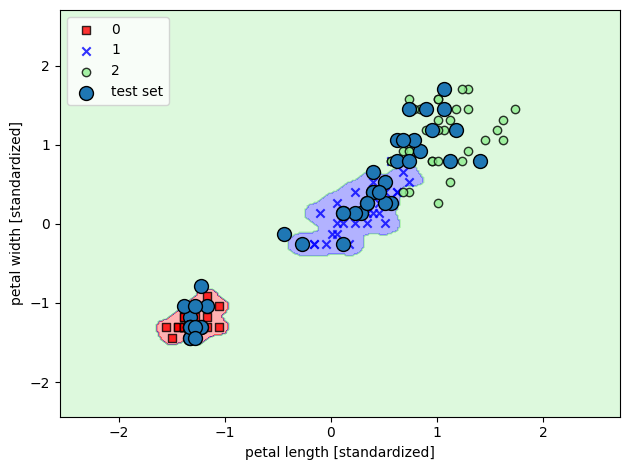

In [ ]:
# RBFカーネルによるSVMのインスタンスを生成（γパラメーラを変更）
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

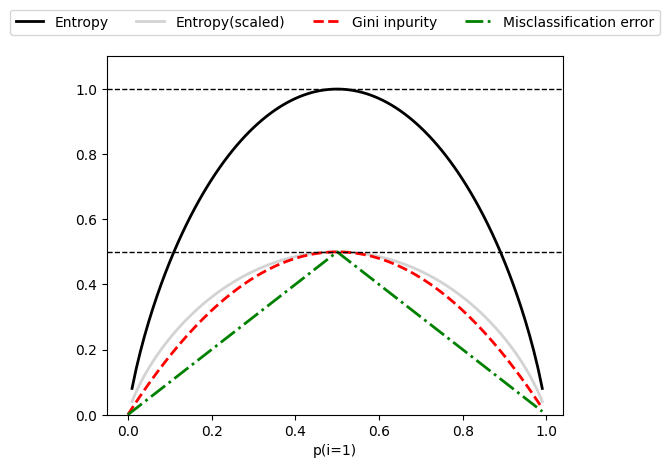

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# ジニ不純度の関数を定義
def gini(p):
  return (p) * (1 - (p)) + (1 - p) * (1 - (1 - p))

# エントロピーの関数を定義
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

# 分類誤差の関数を定義
def error(p):
  return 1 - np.max([p, 1 - p])

# 確率を表す配列を生成
x = np.arange(0.0, 1.0, 0.01)
# 配列の値をもとにエントロピー、分類誤差を計算する
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
# エントロピー（２種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy(scaled)',
                          'Gini inpurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

# 凡例の設定（中央の上に配置）
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
# 2本の水平の波線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
# 横軸の上限/下限を設定
plt.ylim([0, 1.1])
# 軸のラベルを設定
ax.set_xlabel('p(i=1)')
# グラフの表示
plt.tight_layout()
plt.show()

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


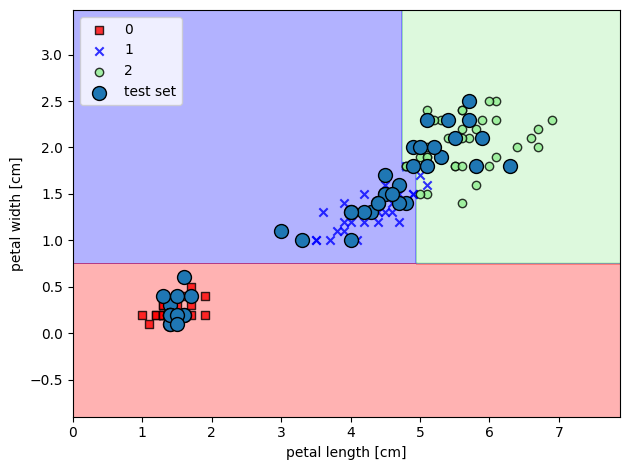

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# ジニ不純度を指標とする決定木のインスタンスを生成
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
# 決定木のモデルに訓練データを適合させる
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

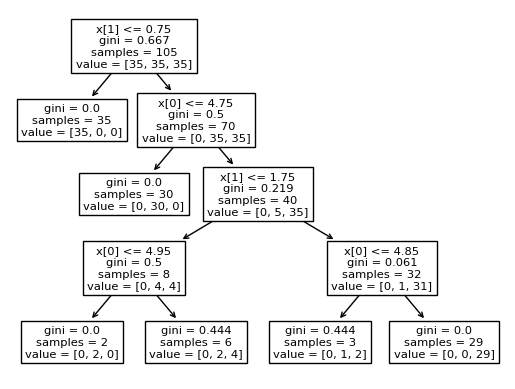

In [ ]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [ ]:
!pip3 install pydotplus

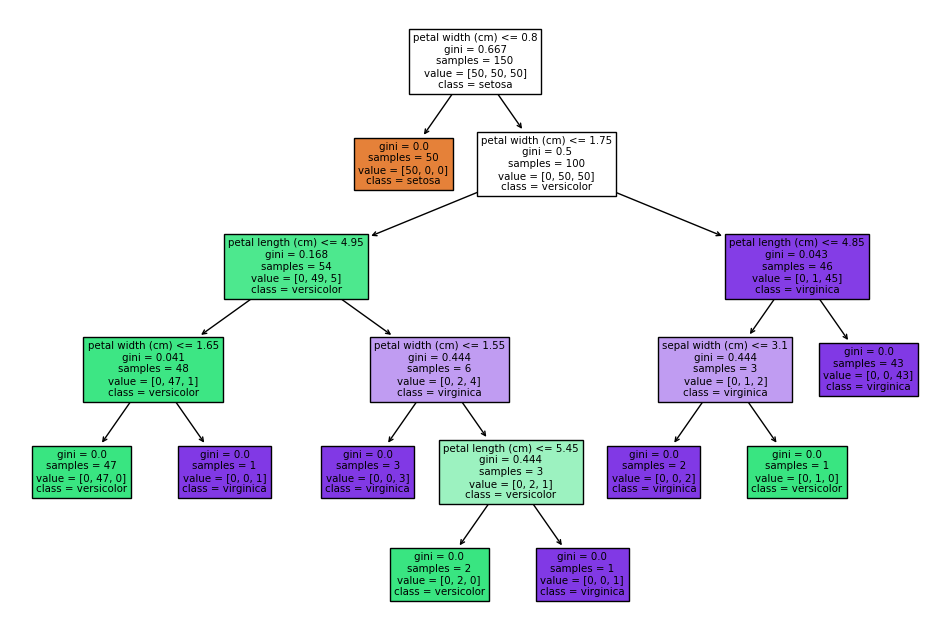

'tree.png'

In [ ]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# データをロードする
iris = load_iris()
X, y = iris.data, iris.target

# 決定木モデルを訓練する
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

# 決定木の描画
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.savefig('tree.png')
plt.show()


from sklearn.tree import export_graphviz
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# データをロードする
iris = load_iris()
X, y = iris.data, iris.target

# 決定木モデルを訓練する
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

# DOTデータを生成する
dot_data = export_graphviz(tree_model, filled=True, rounded=True,
                           class_names=iris.target_names,
                           feature_names=iris.feature_names)

# DOTデータをグラフに変換する
graph = graphviz.Source(dot_data)

# PNGファイルとして保存する
graph.render('tree', format='png', cleanup=True)

# PDFファイルとしても保存可能
# graph.render('tree', format='pdf', cleanup=True)


<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


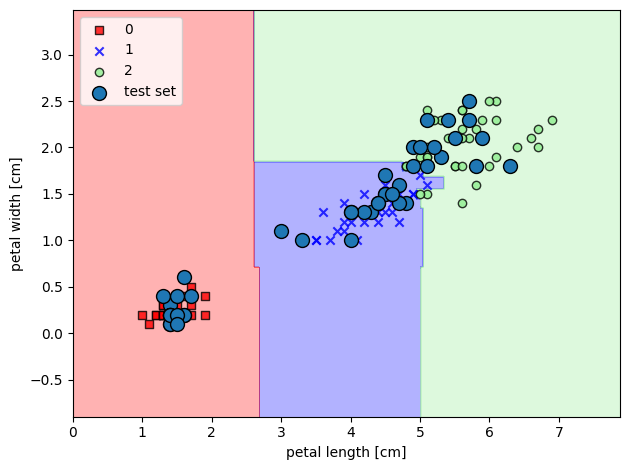

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# ジニ不純度を指標とするランダムフォレストのインスタンスを生成
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, random_state=1, n_jobs=2)
# 訓練データにランダムフォレストのモデルを適合させる
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest,
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-9-7a11bf78f3fc>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


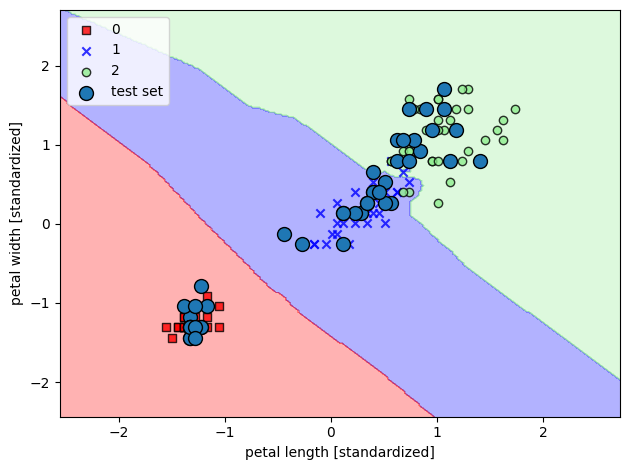

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# K近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# K近傍法のモデルに訓練データを適合させる
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()